Problema:
Necesitamos mover un robot muy simple dependiendo de ciertos estados de los sensores de obstáculos de un robot para lo cual vamos a optar por una de neuronal que sea capaz de tomar la decisión de movimiento basada en la distintas posibilidades de los sensores.
Sensor distancia. Nos detecta un obstáculo con tres posibles datos:
    - 0 si no hay obstáculo
    - 0.5 si está a media distancia
    - 1 si está muy cerca.
Posición del obstáculo:
    - -1 izquierda
    -  0 centro
    -  1 derecho
En cuanto a las salidas tenemos las dos velocidades de los motores izquierdo y derecho del robot:
    - -1: velocidad atras
    -  0: motor parado
    -  1: velocidad adelante
Hay que construir y entrenar una ANN simple para que cumpla con las condiciones de funcionamiento.

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras import optimizers
import matplotlib.pyplot as plt


In [12]:
X = np.array([[0, -1],[0, 0],[0, 1],[0.5, -1],[0.5, 0],[0.5, 1],[1, -1],[1, 0],[1, 1]]).astype("float32")
Y = np.array([[1,0,0,0],[1,0,0,0],[1,0,0,0],[0,1,0,0],[0,1,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,0],[0,0,1,0]]).astype("float32")


In [13]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu',name="l_imput"))
model.add(Dense(8, activation='relu',name="l_hidden"))
model.add(Dense(8, activation='sigmoid',name="l_hidden1"))
model.add(Dense(4, activation='softmax',name="output"))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l_imput (Dense)              (None, 16)                48        
_________________________________________________________________
l_hidden (Dense)             (None, 8)                 136       
_________________________________________________________________
output (Dense)               (None, 4)                 36        
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


In [17]:
print("fitting")
history = model.fit(X, Y, epochs=10000,verbose=False)
# evaluamos el modelo
test_loss, test_acc = model.evaluate(X, Y)
print("end evaluate")
print("\n%s: %.2f%%" % (model.metrics_names[1], test_acc*100))




fitting
9/9 [==============================] - 0s 57us/step
end evaluate

acc: 88.89%


In [18]:


for i in range(len(X)):
    print (X[i],"--",Y[i]," predict: ",model.predict(X)[i].round())

[ 0. -1.] -- [1. 0. 0. 0.]  predict:  [1. 0. 0. 0.]
[0. 0.] -- [1. 0. 0. 0.]  predict:  [1. 0. 0. 0.]
[0. 1.] -- [1. 0. 0. 0.]  predict:  [1. 0. 0. 0.]
[ 0.5 -1. ] -- [0. 1. 0. 0.]  predict:  [0. 1. 0. 0.]
[0.5 0. ] -- [0. 1. 0. 0.]  predict:  [0. 1. 0. 0.]
[0.5 1. ] -- [0. 1. 0. 0.]  predict:  [0. 1. 0. 0.]
[ 1. -1.] -- [0. 0. 1. 0.]  predict:  [0. 0. 1. 0.]
[1. 0.] -- [0. 0. 0. 0.]  predict:  [0. 0. 1. 0.]
[1. 1.] -- [0. 0. 1. 0.]  predict:  [0. 0. 1. 0.]


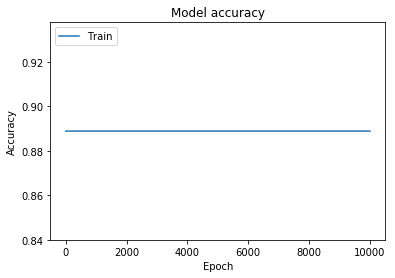

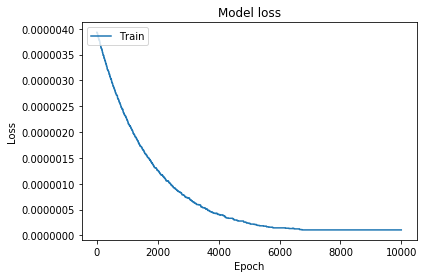

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
